# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [40]:
# your answer here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby(by='Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2
# your answer here
pd.pivot_table(employee, index=['Department'])['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
pd.pivot_table(employee, index=['Department'], columns=['Title'])['Salary']

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index=['Title'], columns=['Years'],fill_value="")

Salary                    
Years          1   2   3   4   7   8
Title                               
VP                                70
analyst       35  30      35        
associate         55  55      60

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee.pivot_table(values = ['Salary'],columns=['Department','Title'], aggfunc=[np.mean, lambda x: x.count()])


mean                                           <lambda>          \
Department    HR            IT                       Sales       HR           
Title         VP analyst    VP analyst associate associate       VP analyst   
Salary      70.0    32.5  70.0    32.5      60.0      55.0        1       2   

                                           
Department IT                       Sales  
Title      VP analyst associate associate  
Salary      1       2         1         2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
employee.pivot_table(values = ['Salary'], index=['Department','Title'], 
                     aggfunc= [np.mean,np.median, min, max, np.std])
"""
-There's no std in the VP and associate title since there's only 1 salary
"""
                                               

"\n-There's no std in the VP and associate title since there's only 1 salary\n"

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
# your answer here
employee.pivot_table(values = ['Salary'], index=['Department','Title'],
                     aggfunc= [np.mean,np.median, min, max, np.std],fill_value= 0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
employee.pivot_table(values=['Salary'], columns=['Department'], aggfunc=[np.sum, lambda x: x.count()])

sum            <lambda>         
Department   HR   IT Sales       HR IT Sales
Salary      135  195   110        3  4     2

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
# your answer here
employee.pivot_table(columns=['Department','Title'], aggfunc={'Years': np.sum,'Salary':np.mean})

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0
Years        8.0     6.0   8.0     3.0       7.0       5.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
# your answer here
fitbit = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [50]:
# your answer here
fitbit.describe()
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [15]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

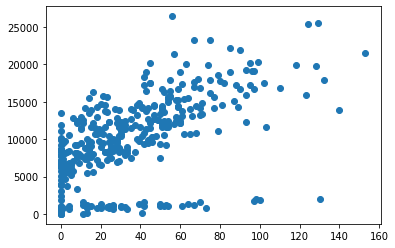

In [17]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [18]:
# your answer here
"""-The chart shows that the ammount of steps is increased while the time pass if the subject is
in movement, we can see sometimes it can get a higher ammount of steps in a low period of time, this might be
related to the rythm that the subject took in that day"""

'- The chart provide useful information about the MVA and steps made due the high correlation\n-The chart shows that the ammount of steps is increased while the time pass, this can relate with\nthe endurance of the subject'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

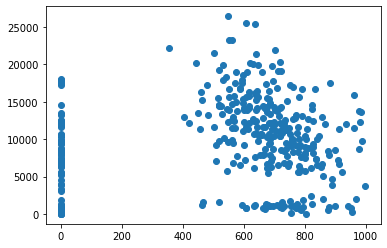

In [46]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [21]:
"""
We can see his low correlation since there's no steps to count while you are inactive,
but in this graph shows that in later time the subject took a certain ammount of steps, 
this can be interpreted as the total steps that took until he decides to stop.
"""

"Since the correlation between the 2 dataset is low, the plot doesn't provide any significant \ninformation since "

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [44]:
# your answer here
print(fitbit['MinutesOfSleep'].corr(fitbit['Steps']))


0.13098565950836388


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

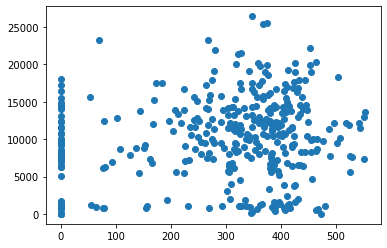

In [23]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

In [ ]:
"""
As in the previous comparison, the correlation is low since there is no steps to count while you are 
inactive; or in this case, asleep. And also as in the previous graph, it shows that there is a certain
ammount of steps while time pass, but this can mean the total of steps that took in that day 
and then went to sleep
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

<AxesSubplot:>

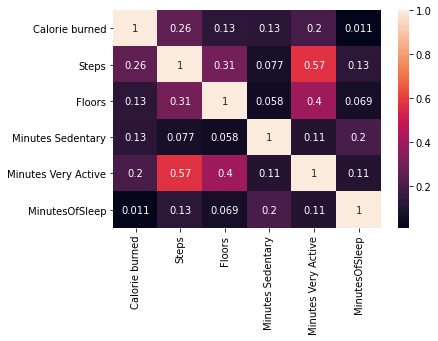

In [41]:
# your answer here
cor_fit= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 
                 'MinutesOfSleep']].corr()
sns.heatmap(cor_fit, annot = True)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [53]:
# your answer here
fitbit.sort_values(by='Steps', ascending =False)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
36,13-06-2015,4083,26444,19.65,22,549.000,429,56,56,2818,347,45,21,401
357,28-04-2016,403,25571,19.30,15,606.000,293,42,129,2711,374,56,34,430
314,16-03-2016,396,25385,20.45,17,638.000,254,17,124,2556,368,46,22,414
206,30-11-2015,4012,23313,17.32,16,550.000,389,67,75,2743,69,2,1,71
335,06-04-2016,4112,23286,17.84,19,561.000,451,28,67,285,267,34,15,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,24-01-2016,1801,39,0.03,0,1.076,5,0,0,160,0,0,0,0
81,28-07-2015,298,10,7.43,13,803.000,230,44,11,137,472,29,16,519
326,28-03-2016,179,0,0.00,0,1.440,0,0,0,0,0,0,0,0
229,23-12-2015,1789,0,0.00,0,1.440,0,0,0,0,0,0,0,0


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [55]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

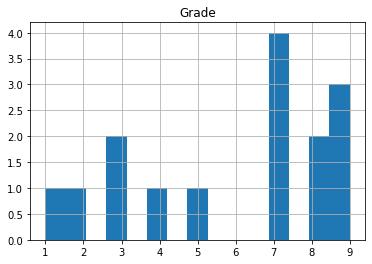

Text(0.5, 1.0, 'Study time')

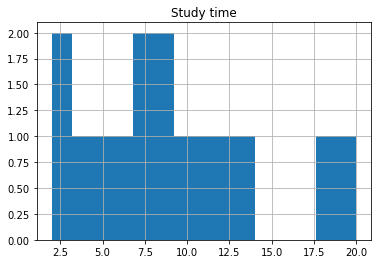

In [86]:
# your answer here

time_grades['Grade'].hist(bins=15)
plt.title('Grade')
plt.show()
time_grades['Study time'].hist(bins=15)
plt.title('Study time')

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [76]:
# your answer here
print('Pearson',time_grades['Grade'].corr(time_grades['Study time'],method='pearson'))
print('Spearman',time_grades['Grade'].corr(time_grades['Study time'],method='spearman'))

Pearson 0.7980456073578858
Spearman 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

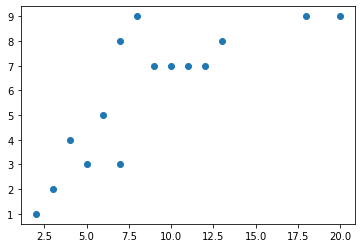

In [87]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [30]:
# your answer here
"""
-spearman uses a ranking system to obtain the results while pearson applies the values directly 
to the formula
-pearson is better used in interval scales (variables where the difference in the values is meaningful
and equal) spearman fits better in ordinal scales (variables where the difference in the values are not clear)
"""